In [1]:
# Dependencies 
import pandas as pd
import requests
import string
import matplotlib.pyplot as plt

In [2]:
fatal_crash_file = 'csv_files/fatal_accidents_2019.csv'
county_info = 'csv_files/cleaned_county_vs_crash_count'
crashes_df = pd.read_csv(fatal_crash_file, low_memory=False)
pd.set_option('display.max_columns', 94)
crashes_df = crashes_df.set_index('STATENAME', append=True)

In [7]:
crashes_df.dtypes()

TypeError: 'numpy.dtype' object is not callable

In [9]:
drunk_df = crashes_df[crashes_df['DRUNK_DR']==1]

In [10]:
drunk_df

,,Unnamed: 0,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,CITY,CITYNAME,COUNTY,COUNTYNAME,CaseYear,DAY,DAY_WEEK,DAY_WEEKNAME,DRUNK_DR,FATALS,FUNC_SYS,FUNC_SYSNAME,HARM_EV,HARM_EVNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,HOUR,HOURNAME,LATITUDE,LATITUDENAME,LGT_COND,LGT_CONDNAME,LONGITUD,LONGITUDNAME,MAN_COLL,MAN_COLLNAME,MILEPT,MILEPTNAME,MINUTE,MINUTENAME,MONTH,MonthName,NHS,NHSNAME,NOT_HOUR,NOT_HOURNAME,NOT_MIN,NOT_MINNAME,PEDS,PERMVIT,PERNOTMVIT,PERSONS,PVH_INVL,RAIL,RAILNAME,RD_OWNER,RD_OWNERNAME,RELJCT1,RELJCT1NAME,RELJCT2,RELJCT2NAME,REL_ROAD,REL_ROADNAME,ROAD_FNC,ROAD_FNCNAME,ROUTE,ROUTENAME,RUR_URB,RUR_URBNAME,SCH_BUS,SCH_BUSNAME,SP_JUR,SP_JURNAME,ST_CASE,State,TWAY_ID,TWAY_ID2,TYP_INT,TYP_INTNAME,VE_FORMS,VE_TOTAL,WEATHER,WEATHER1,WEATHER1NAME,WEATHER2,WEATHER2NAME,WEATHERNAME,WRK_ZONE,WRK_ZONENAME,YEAR
,STATENAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Alabama,0,13,1:00pm-1:59pm,9,9,0,None,0,None,0,None,2340,OPELIKA,81,LEE (81),2019,7,5,Thursday,1,1,1,Interstate,12,Motor Vehicle In-Transport,13,1:00pm-1:59pm,27,27,12,12:00pm-12:59pm,32.666222,32.666222,1,Daylight,-85.336658,-85.336658,1,Front-to-Rear,641,641,54,54,2,February,1,This section IS ON the NHS,12,12:00pm-12:59pm,59,59,0,3,0,3,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,1,Interstate,2,Urban,0,No,0,No Special Jurisdiction,10001,1,I-85,NaN,1,Not an Intersection,2,2,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
4,Alabama,4,6,6:00am-6:59am,0,0,0,None,0,None,0,None,0,NOT APPLICABLE,3,BALDWIN (3),2019,18,6,Friday,1,1,1,Interstate,1,Rollover/Overturn,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),5,5:00am-5:59am,30.656269,30.656269,2,Dark - Not Lighted,-87.809461,-87.809461,0,The First Harmful Event was Not a Collision wi...,413,413,50,50,1,January,1,This section IS ON the NHS,99,Unknown,99,Unknown,0,1,0,1,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,4,On Roadside,NaN,NaN,1,Interstate,2,Urban,0,No,0,No Special Jurisdiction,10005,1,I-10,NaN,1,Not an Intersection,1,1,5,5,"Fog, Smog, Smoke",0,No Additional Atmospheric Conditions,"Fog, Smog, Smoke",0,None,2019
7,Alabama,7,88,Not Applicable,88,Not Applicable,0,None,0,None,0,None,790,COTTONWOOD,69,HOUSTON (69),2019,9,7,Saturday,1,1,7,Local,1,Rollover/Overturn,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),21,9:00pm-9:59pm,31.068686,31.068686,2,Dark - Not Lighted,-85.333658,-85.333658,0,The First Harmful Event was Not a Collision wi...,0,None,2,2,2,February,0,This section IS NOT on the NHS,88,Not Applicable (Not Notified),88,Not Applicable (Not Notified),0,1,0,1,0,0000000,Not Applicable,2,County Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,4,County Road,1,Rural,0,No,0,No Special Jurisdiction,10008,1,CR-FLETCHER SMITH RD,NaN,1,Not an Intersection,1,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
10,Alabama,10,2,2:00am-2:59am,23,23,0,None,0,None,0,None,0,NOT APPLICABLE,123,TALLAPOOSA (123),2019,1,3,Tuesday,1,1,4,Minor Arterial,42,Tree (Standing Only),99,Unknown,99,Unknown EMS Hospital Arrival Time,1,1:00am-1:59am,33.104300,33.104300,2,Dark - Not Lighted,-85.773344,-85.773344,0,The First Harmful Event was Not a Collision wi...,528,528,45,45,1,January,0,This section IS NOT on the NHS,99,Unknown,99,Unknown,0,3,0,3,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,4,On Roadside,NaN,NaN,3,State Highway,1,Rural,0,No,0,No Special Jurisdiction,10011,1,SR-49,NaN,1,Not an Intersection,1,1,2,2,Rain,0,No Additional Atmospheric Conditions,Rain,0,None,2019
27,Alabama,27,16,4:00pm-4:59pm,18,18,0,None,0,None,0,None,3050,TUSCALOOSA,125,TUSCALOOSA (125),2019,12,7,Saturday,1,2,3,Principal Arterial - Other,12,Motor Vehicle In-Transport,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),16,4:00pm-4:59pm,33.170528,33.170528,1,Daylight,-87.486125,-87.4

In [14]:
state_count = drunk_df.groupby('STATENAME').count()

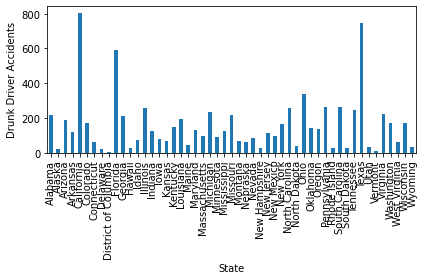

In [18]:
state_countplt = state_count['CITY']
state_countplt.plot(kind='bar')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Drunk Driver Accidents')
plt.tight_layout()
plt.show()

In [53]:
rur_urb = drunk_df.groupby(['STATENAME', 'RUR_URBNAME']).count().unstack('RUR_URBNAME')
rurb_count = rur_urb['Unnamed: 0']
rurb_count.keys()

Index(['Not Reported', 'Rural', 'Trafficway Not in State Inventory', 'Unknown',
       'Urban'],
      dtype='object', name='RUR_URBNAME')

In [67]:
rur_urb_b = rurb_count[['Urban']]
rur_urb_c = rurb_count[['Rural']]

urb_rur_list = [rur_urb_b, rur_urb_c]

AttributeError: 'list' object has no attribute 'T'

In [69]:
urb_rur_list

[RUR_URBNAME           Urban
 STATENAME                  
 Alabama                95.0
 Alaska                  9.0
 Arizona               110.0
 Arkansas               32.0
 California            505.0
 Colorado              103.0
 Connecticut            46.0
 Delaware                9.0
 District of Columbia    3.0
 Florida               379.0
 Georgia               128.0
 Hawaii                 24.0
 Idaho                  11.0
 Illinois              158.0
 Indiana                64.0
 Iowa                   28.0
 Kansas                 16.0
 Kentucky               54.0
 Louisiana              92.0
 Maine                   6.0
 Maryland               94.0
 Massachusetts          91.0
 Michigan              132.0
 Minnesota              37.0
 Mississippi            39.0
 Missouri              107.0
 Montana                10.0
 Nebraska               20.0
 Nevada                 54.0
 New Hampshire          19.0
 New Jersey             96.0
 New Mexico             38.0
 New York     